In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


In [5]:
data=pd.read_csv("C:/Users\dell\Documents\datasets/breastcancer.csv")


In [7]:
data.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [8]:
data.shape


(569, 32)

In [9]:
data.columns


Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [10]:
data.isna().sum()


id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [11]:
# As our dataset is balanced (around 60-40 ratio), there is no need to balance our data
data.diagnosis.value_counts(normalize = True)


B    0.627417
M    0.372583
Name: diagnosis, dtype: float64

In [12]:
# Mapping our target variable to 1 and 0
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['diagnosis'] = le.fit_transform(data['diagnosis'])


In [13]:
data.diagnosis.value_counts(normalize=True)


0    0.627417
1    0.372583
Name: diagnosis, dtype: float64

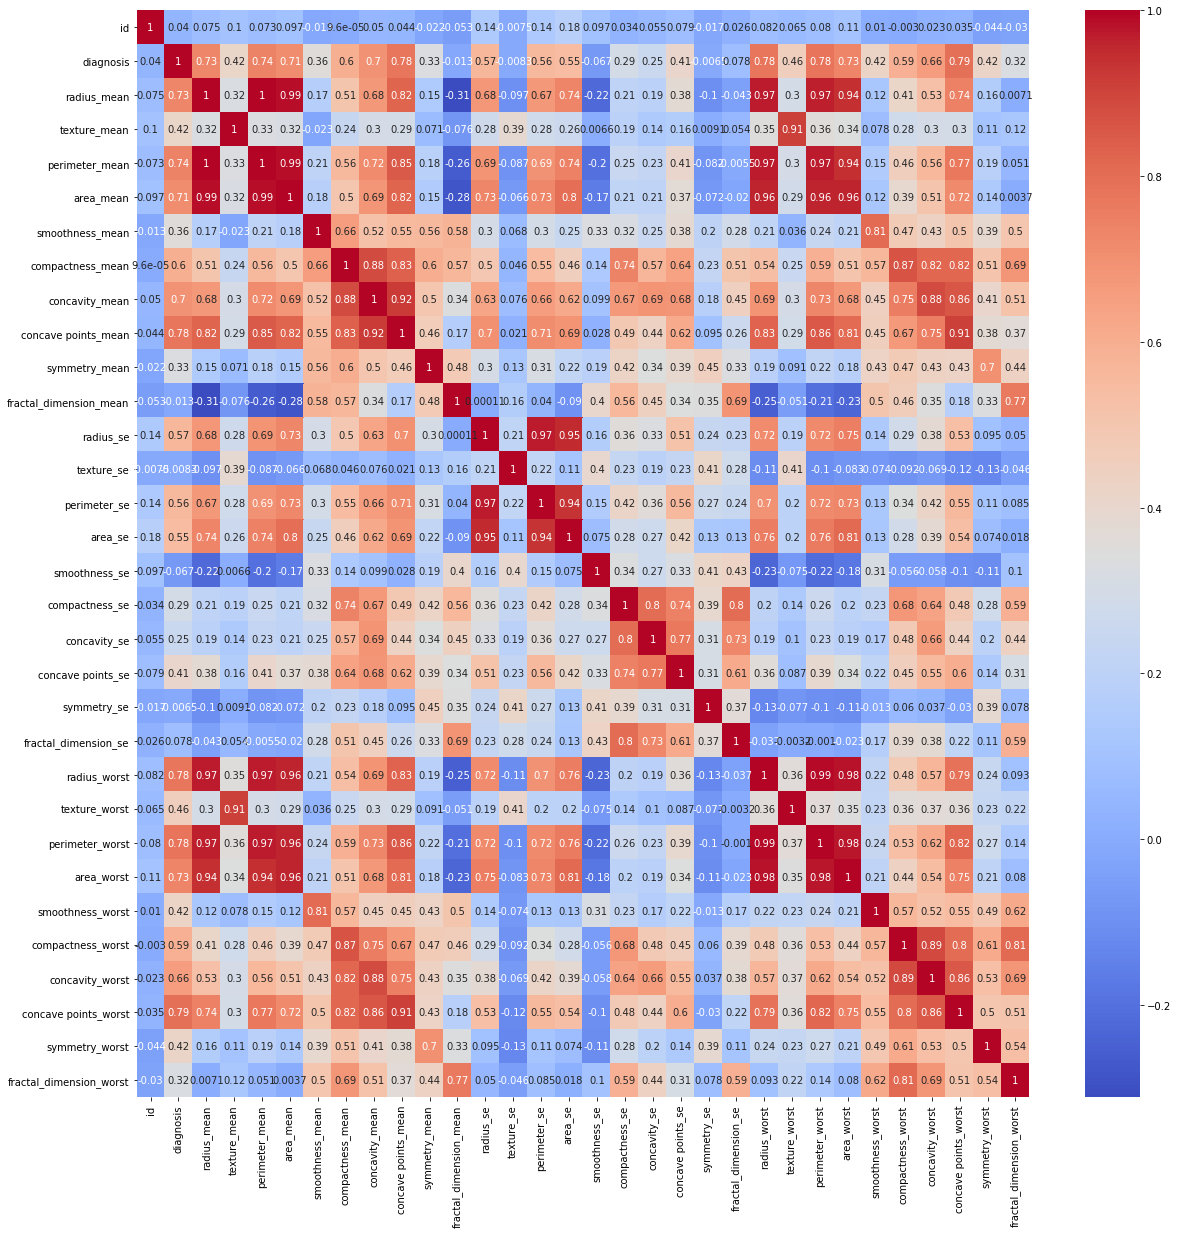

In [14]:
# Finding correlation among features using sns' heatmap
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(),annot=True,cmap='coolwarm')


In [15]:
# removing features that are less correlated with our target variable
data.corr().diagnosis[data.corr().diagnosis<=0.2]


id                        0.039769
fractal_dimension_mean   -0.012838
texture_se               -0.008303
smoothness_se            -0.067016
symmetry_se              -0.006522
fractal_dimension_se      0.077972
Name: diagnosis, dtype: float64

In [16]:
less_corr = data.corr().diagnosis[data.corr().diagnosis<=0.2].index
data = data.drop(less_corr,axis=1)
data.shape


(569, 26)

In [17]:
# Standardizing our features except target variable
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
stand_scale = data.drop(['diagnosis'],axis = 1)
col_trans = make_column_transformer((StandardScaler(), stand_scale.columns),remainder = 'passthrough')




In [18]:
# Train Test Split
from sklearn.model_selection import train_test_split
X = data.drop(['diagnosis'], axis = 1)
y = data['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)



In [19]:
col_trans.fit_transform(X_train)


array([[-1.15036482, -0.39064196, -1.12855021, ..., -0.75798367,
        -0.01614761, -0.38503402],
       [-0.93798972,  0.68051405, -0.94820146, ..., -0.60687023,
         0.09669004, -0.38615797],
       [ 0.574121  , -1.03333557,  0.51394098, ..., -0.02371948,
        -0.20050207, -0.75144254],
       ...,
       [-1.32422924, -0.20048168, -1.31754581, ..., -0.97974953,
        -0.71542314, -0.11978123],
       [-1.24380987, -0.2245526 , -1.28007609, ..., -1.75401433,
        -1.58157125, -1.00601779],
       [-0.73694129,  1.14989702, -0.71226578, ..., -0.27460457,
        -1.25895095,  0.21515662]])

# DATA VISULIZATION

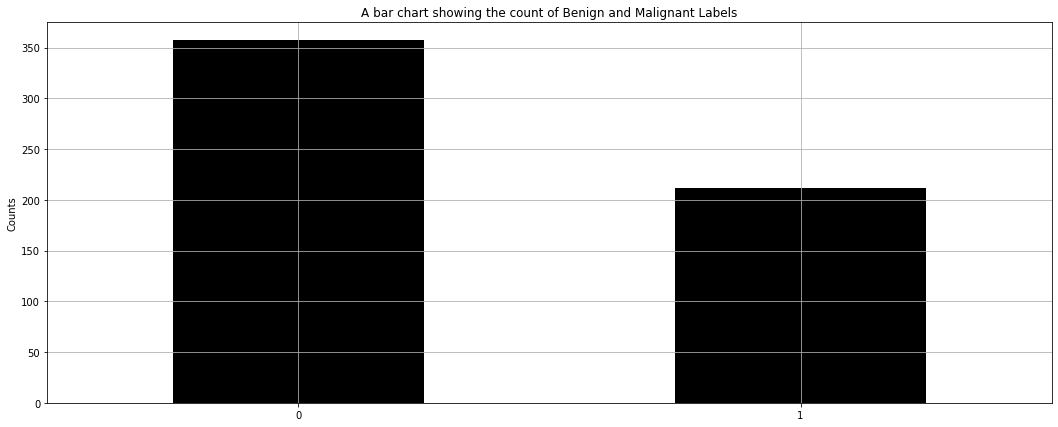

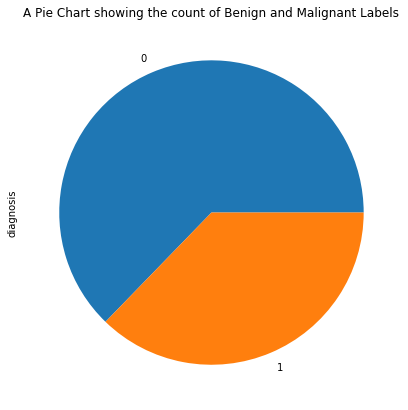

Number of Benign: 357
Number of Benign: 357


In [146]:
value_count = data['diagnosis'].value_counts() 

# Setting the figure size of the plot 
plt.figure(figsize = (18, 7))

# Plotting the Count for the value counts in the diagnosis column
value_count.plot(kind = "bar", color = "black", rot=0)
plt.ylabel("Counts")
plt.title("A bar chart showing the count of Benign and Malignant Labels")
plt.grid(True)
plt.show() 

# Plotting a pie chart of the imbalanced dataset 
value_count.plot(kind = "pie", figsize=(18, 7))
plt.title("A Pie Chart showing the count of Benign and Malignant Labels")
plt.show() 

# Printing the number of counts for the values of the labels in the diagnosis column 
B, M = value_count 
print("Number of Benign: {}".format(B))
print("Number of Benign: {}".format(B))






# Classification Models


# 1)RANDOM FOREST

In [82]:
#creating a model

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state = 1)
model.fit(X_train, y_train)





RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [83]:
print("Random forest algorithm result:" , model.score(X_test, y_test))

Random forest algorithm result: 0.956140350877193


In [84]:
y_predict = model.predict(X_test)

In [85]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,y_predict)
print('Accuracy is: ',accuracy)


Accuracy is:  0.956140350877193


In [86]:
#precision Score
print("Precision:",metrics.precision_score(y_test, y_predict))


Precision: 0.9375


In [87]:
#recall score
print("recall:",metrics.recall_score(y_test, y_predict))
print(metrics.classification_report(y_test,y_predict))


recall: 0.9574468085106383
              precision    recall  f1-score   support

           0       0.97      0.96      0.96        67
           1       0.94      0.96      0.95        47

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



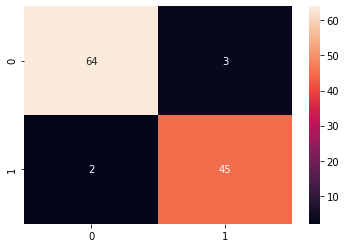

In [88]:
from sklearn.metrics import f1_score,confusion_matrix
cm = confusion_matrix(y_test,y_predict)
sns.heatmap(cm,annot=True,fmt="d")


# 2) SVM

In [115]:
#creating the model
from sklearn import svm
model=svm.SVC(kernel='linear')

#train the model
model.fit(X_train,y_train)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [116]:
#predict the response
y_pred=model.predict(X_test)
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.9473684210526315


In [117]:
#precision Score
print("Precision:",metrics.precision_score(y_test, y_pred))


Precision: 0.9019607843137255


In [118]:
#recall score
print("recall:",metrics.recall_score(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))


recall: 0.9787234042553191
              precision    recall  f1-score   support

           0       0.98      0.93      0.95        67
           1       0.90      0.98      0.94        47

    accuracy                           0.95       114
   macro avg       0.94      0.95      0.95       114
weighted avg       0.95      0.95      0.95       114



# 3) LOSGISTIC REGRESSION

In [119]:
#creating a model
from sklearn.linear_model import LogisticRegression
model= LogisticRegression()
model.fit(X_train, y_train)



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [120]:
predictions=model.predict(X_test)


In [121]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, predictions))



Accuracy: 0.9473684210526315


In [122]:
#precision Score
print("Precision:",metrics.precision_score(y_test, y_pred))


Precision: 0.9019607843137255


In [123]:
#recall score
print("recall:",metrics.recall_score(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))


recall: 0.9787234042553191
              precision    recall  f1-score   support

           0       0.98      0.93      0.95        67
           1       0.90      0.98      0.94        47

    accuracy                           0.95       114
   macro avg       0.94      0.95      0.95       114
weighted avg       0.95      0.95      0.95       114



# 4) DESCISON TREE 

In [127]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score


scores = []
for i in range(1, len(X.columns) + 1):
    dt_classifier = DecisionTreeClassifier(max_features = i, random_state = 0)
    pipe = make_pipeline(col_trans,dt_classifier)
    scores.append(cross_val_score(pipe, X_train, y_train, cv=5, scoring='accuracy').mean())



Text(0.5, 1.0, 'Decision Tree Classifier scores for different number of maximum features')

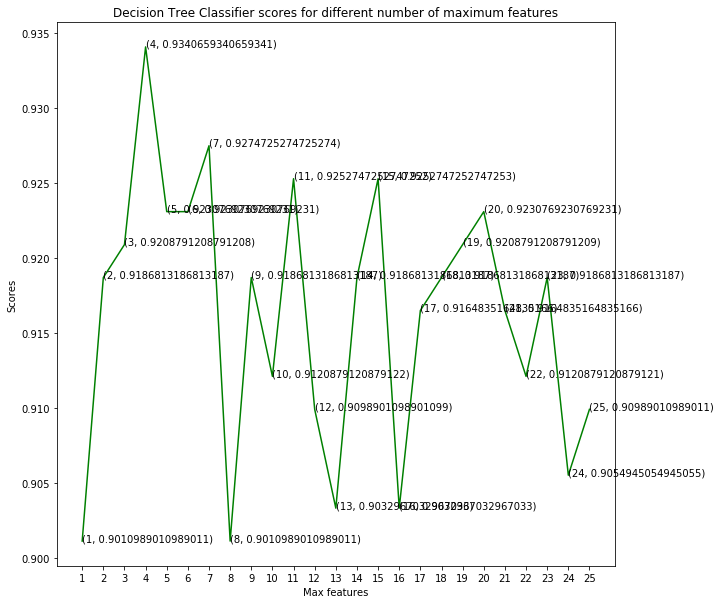

In [128]:
plt.figure(figsize=(10,10))
plt.plot([i for i in range(1, len(X.columns) + 1)], scores, color = 'green')
for i in range(1, len(X.columns) + 1):
    plt.text(i, scores[i-1], (i, scores[i-1]))
plt.xticks([i for i in range(1, len(X.columns) + 1)])
plt.xlabel('Max features')
plt.ylabel('Scores')
plt.title('Decision Tree Classifier scores for different number of maximum features')


In [130]:
print('Accuracy score on Train data: {}'.format(scores[3]*100))


Accuracy score on Train data: 93.4065934065934


In [131]:
dt_classifier = DecisionTreeClassifier(max_features = 4, random_state = 0)
pipe = make_pipeline(col_trans,dt_classifier)
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
print('Accuracy  score on Test data: {}'.format(metrics.accuracy_score(y_test,y_pred)*100))


Accuracy  score on Test data: 94.73684210526315


In [138]:
#Generating Model
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors = 8)
pipe = make_pipeline(col_trans,knn_classifier)
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
print('Accuracy score on Test Data: {}'.format(metrics.accuracy_score(y_test,y_pred)*100))


Accuracy score on Test Data: 94.73684210526315
